## GRIP At The Sparks Foundation¶


##**TASK** **2**   **Prediction** **Using** **UnSupervised**  **ML**
#**Submitted** **By** - **Yash** **Jitendra** **Modi**

**K** **Means Clustering** **with** **Python** Scikit **Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement K means functions. We will start with simple linear regression involving two variables.

In this task we will classify the iris on the basis of its size and structure.

In [27]:
# Python Libraries required for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [28]:
#Importing the dataset

df=pd.read_csv("Iris.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### So here there is no null values so we not have to worry for it

In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Here as there is difference in the mean, median, std value so so we have to normalised data

In [31]:
# For insight of data in the coloumn
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [32]:
df.shape

(150, 6)

In [33]:
df.drop('Id',inplace=True,axis=1)

In [34]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


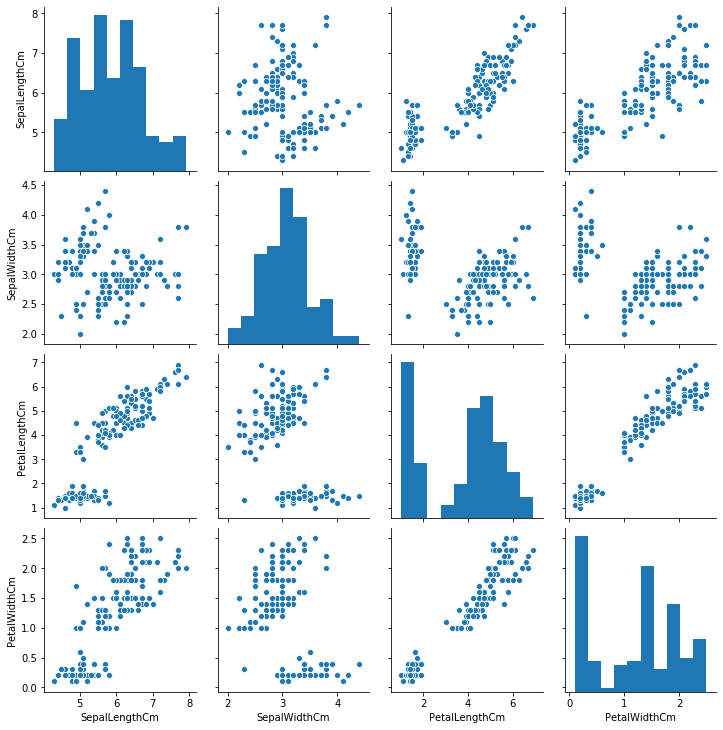

In [35]:
sns.pairplot(df)
plt.show()

## Normalizing the data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,:-1])
scale=scaler.transform(df.iloc[:,:-1])

In [37]:
scaled_df = pd.DataFrame(scale,columns=df.columns.values[:4])

In [38]:
scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Data Visualization

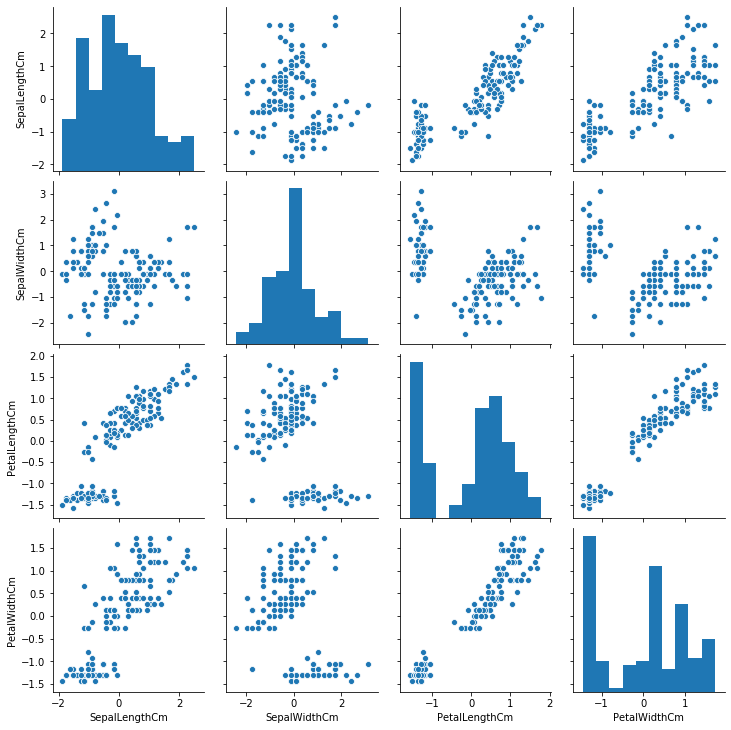

In [39]:
sns.pairplot(scaled_df)
plt.show()

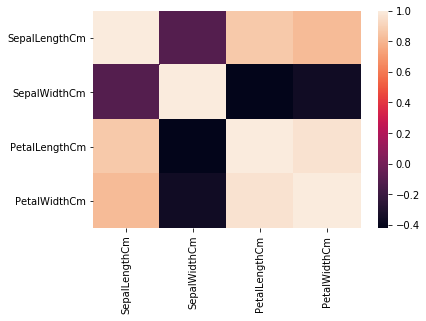

In [40]:
sns.heatmap(scaled_df.corr())


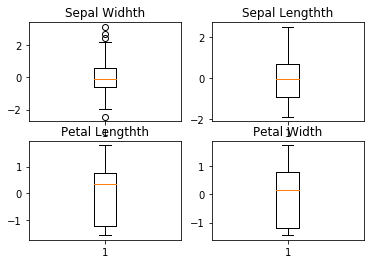

In [41]:
fig,a =  plt.subplots(2,2)
a[0][0].boxplot(scaled_df['SepalWidthCm'])
a[0][0].set_title('Sepal Widhth')
a[0][1].boxplot(scaled_df['SepalLengthCm'])
a[0][1].set_title('Sepal Lengthth')
a[1][0].boxplot(scaled_df['PetalLengthCm'])
a[1][0].set_title('Petal Lengthth')
a[1][1].boxplot(scaled_df['PetalWidthCm'])
a[1][1].set_title('Petal Width')
plt.show()


### Calculating K Value Using Elbow Method

### Calculating distortions which is basically the average of the squared distances from the cluster centers of the respective clusters using Euclidean distance metric and inertias which is the sum of squared distances of samples to their closest cluster center.¶
From Where there less decreasing we will select that as K 

In [42]:
inertias = [] 
K = range(1,11) 
X = scaled_df.iloc[:, [0, 1, 2, 3]].values 
    
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
    
    
    inertias.append(kmeanModel.inertia_)


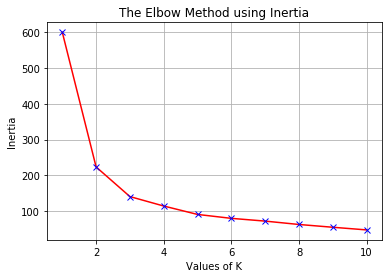

In [43]:
# Plotting Inertias VS Values of K (Elbow Method)
plt.plot(K, inertias, 'bx-', c="r",markeredgecolor='b') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.grid()
plt.show()


**From the above elbow plots , we can clearly see that in both the plots the elbow occurs at "3" which means distortions and inertias now decrease with nominal change in every iteration.**


### Applying K 

In [44]:
# Applying KMeans to the iris dataframe
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


In [45]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [46]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [47]:
# For insight of data in the coloumn
df['cluster_id'].value_counts()


2    53
1    50
0    47
Name: cluster_id, dtype: int64

### Visualise the Clusters

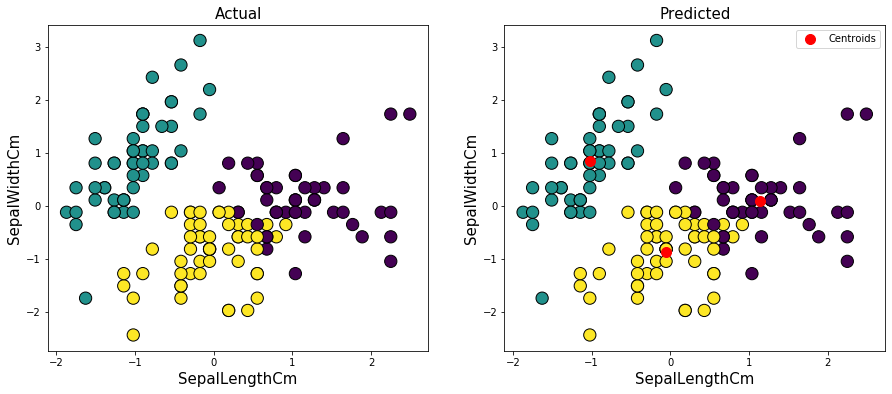

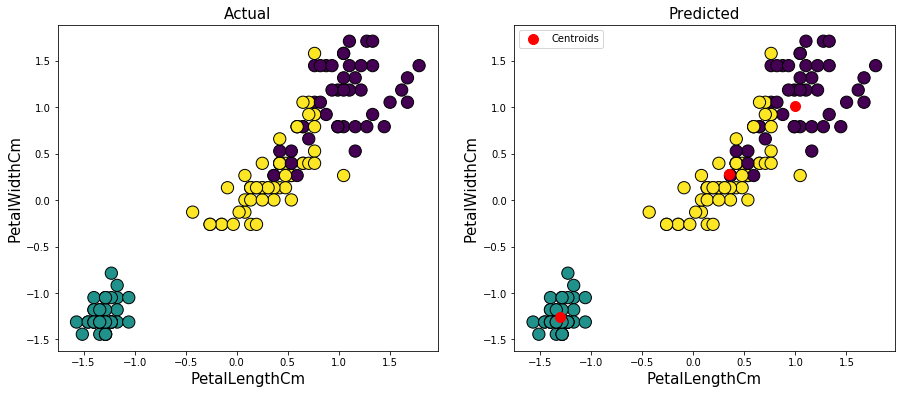

In [48]:
# Visualising the clusters


fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].set_xlabel('SepalLengthCm', fontsize=15)
axes[0].set_ylabel('SepalWidthCm', fontsize=15)
axes[1].set_xlabel('SepalLengthCm', fontsize=15)
axes[1].set_ylabel('SepalWidthCm', fontsize=15)
axes[0].scatter(X[:,0], X[:,1], c=y_kmeans,s=150, edgecolor='k')
axes[0].set_title("Actual", fontsize=15)
axes[1].scatter(X[:,0], X[:,1], c=y_kmeans,s=150, edgecolor='k')
axes[1].set_title("Predicted", fontsize=15)

# Plotting the centroids of the clusters
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

# Plot 
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].scatter(X[:,2], X[:,3], c=y_kmeans,s=150, edgecolor='k')
axes[0].set_title("Actual", fontsize=15)
axes[1].scatter(X[:,2], X[:,3], c=y_kmeans,s=150, edgecolor='k')
axes[0].set_xlabel('PetalLengthCm', fontsize=15)
axes[0].set_ylabel('PetalWidthCm', fontsize=15)
axes[1].set_xlabel('PetalLengthCm', fontsize=15)
axes[1].set_ylabel('PetalWidthCm', fontsize=15)
axes[1].set_title("Predicted", fontsize=15)
# Plotting the centroids of the clusters
axes[1].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()


In [49]:
silhouette_score(X,df['cluster_id'])

0.4589717867018717

**Observations: We have divided the datasets in to the three clusters ( shown with the red dot) in the above diagram**

### Thank You!